# Census Bureau Data Analysis

In [1]:
# Import Libraries and Load the Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "../datasets/Adult/adult_dataset.csv"
df = pd.read_csv(file_path)

# Check the first few rows of the dataset
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [2]:
# Data Cleaning
# Check for missing values
df.isnull().sum()

# Replace missing values in categorical columns with 'Unknown'
df['workclass'].fillna('Unknown', inplace=True)
df['occupation'].fillna('Unknown', inplace=True)
df['native-country'].fillna('Unknown', inplace=True)

# For numerical columns, replace missing values with the mean
df['fnlwgt'].fillna(df['fnlwgt'].mean(), inplace=True)

# Convert 'income' to binary values: <=50K -> 0, >50K -> 1
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_48972\441299849.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna('Unknown', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_48972\441299849.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

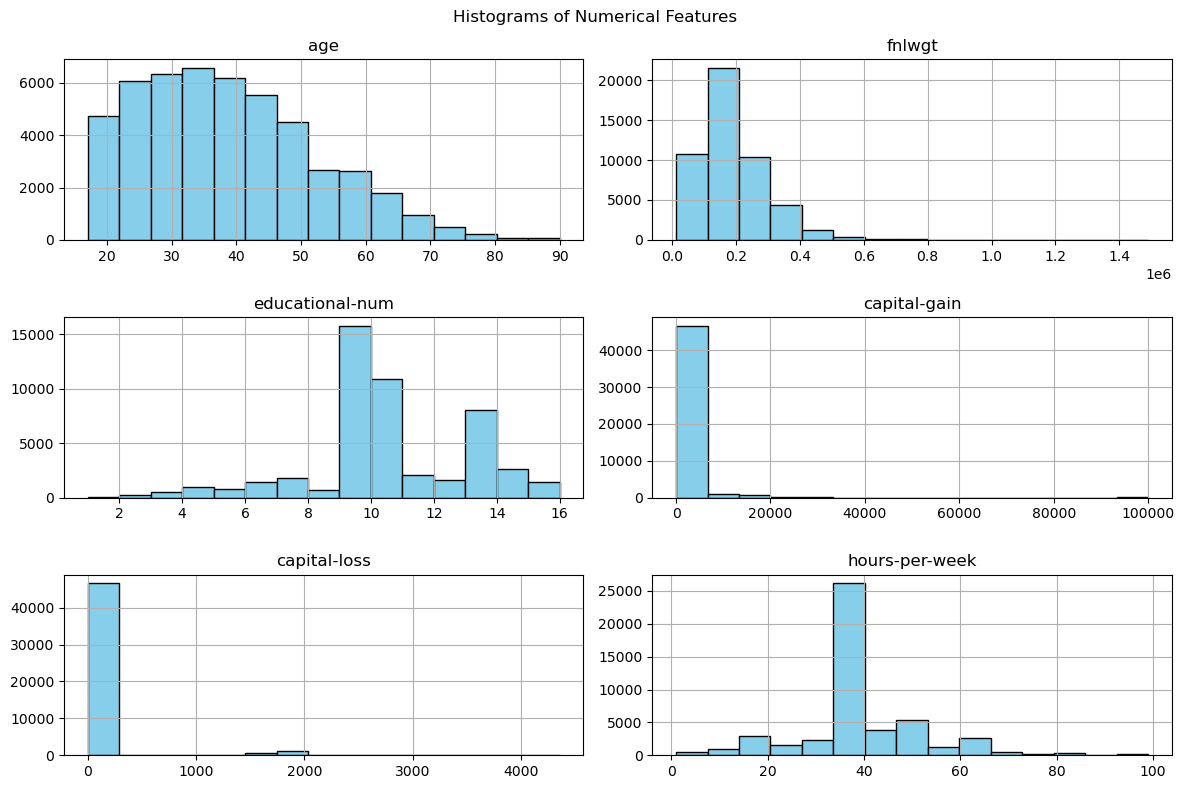

In [6]:
# Histograms of Numerical Features
# Numerical columns to plot histograms for
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Plot histograms for each numerical column
df[numerical_cols].hist(bins=15, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()


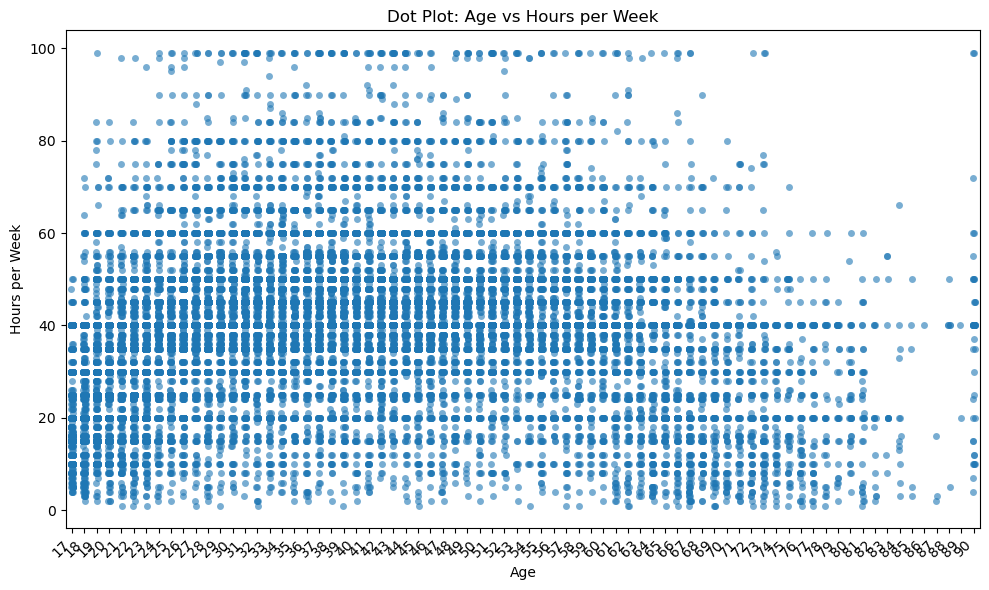

In [11]:
# Plot a dot plot for age vs hours-per-week
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='age', y='hours-per-week', jitter=True, alpha=0.6)

# Title and labels
plt.title('Dot Plot: Age vs Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')

# Rotate x-axis labels and adjust the number of ticks
plt.xticks(rotation=45, ha='right')  # Rotate labels by 45 degrees
plt.tight_layout()

plt.show()

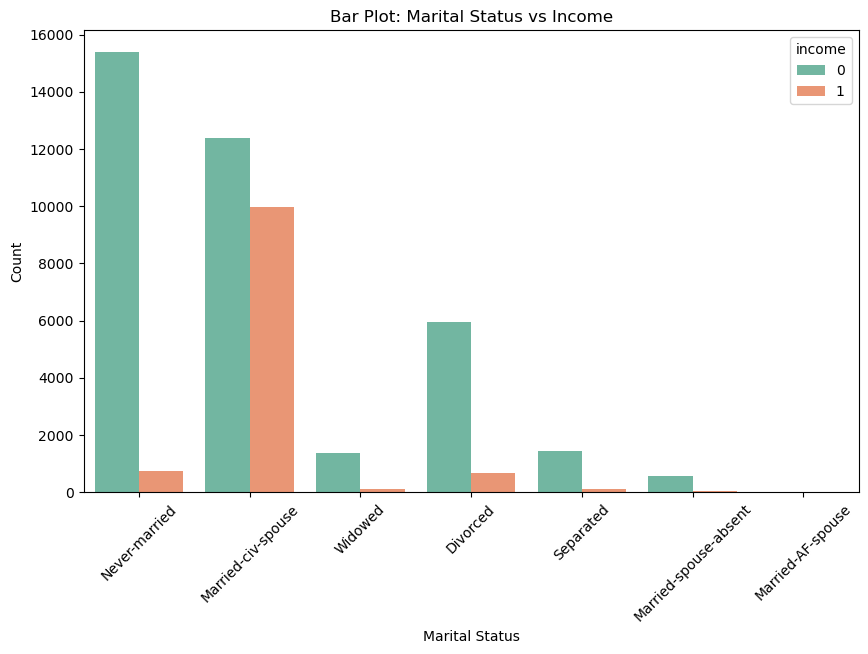

In [8]:
# Bar plot for marital-status vs income
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital-status', hue='income', palette='Set2')
plt.title('Bar Plot: Marital Status vs Income')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_48972\1380264344.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_hours = df.groupby(age_groups)['hours-per-week'].mean().reset_index()


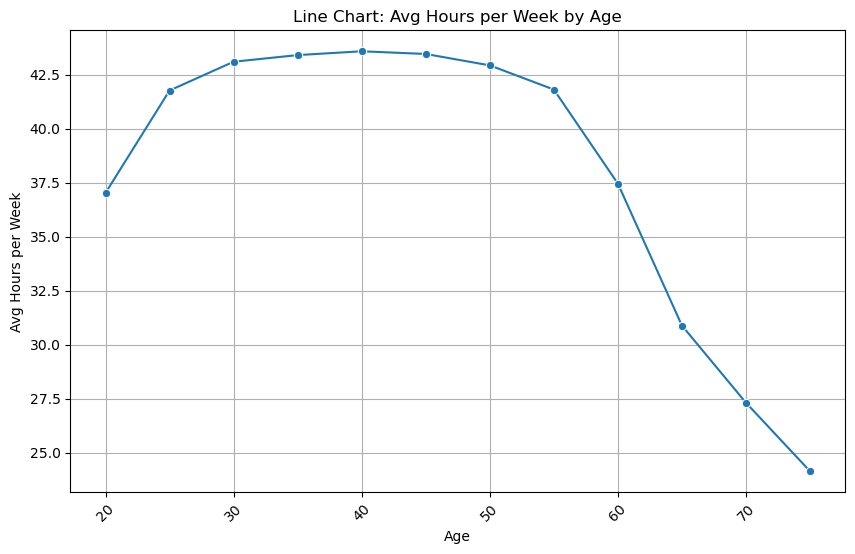

In [12]:
# Create age groups
age_groups = pd.cut(df['age'], bins=range(20, 81, 5))

# Calculate the average hours per week for each age group
avg_hours = df.groupby(age_groups)['hours-per-week'].mean().reset_index()

# Extract the lower bound of the age group intervals for plotting
avg_hours['age'] = avg_hours['age'].apply(lambda x: x.left)

# Plot the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_hours, x='age', y='hours-per-week', marker='o')
plt.title('Line Chart: Avg Hours per Week by Age')
plt.xlabel('Age')
plt.ylabel('Avg Hours per Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

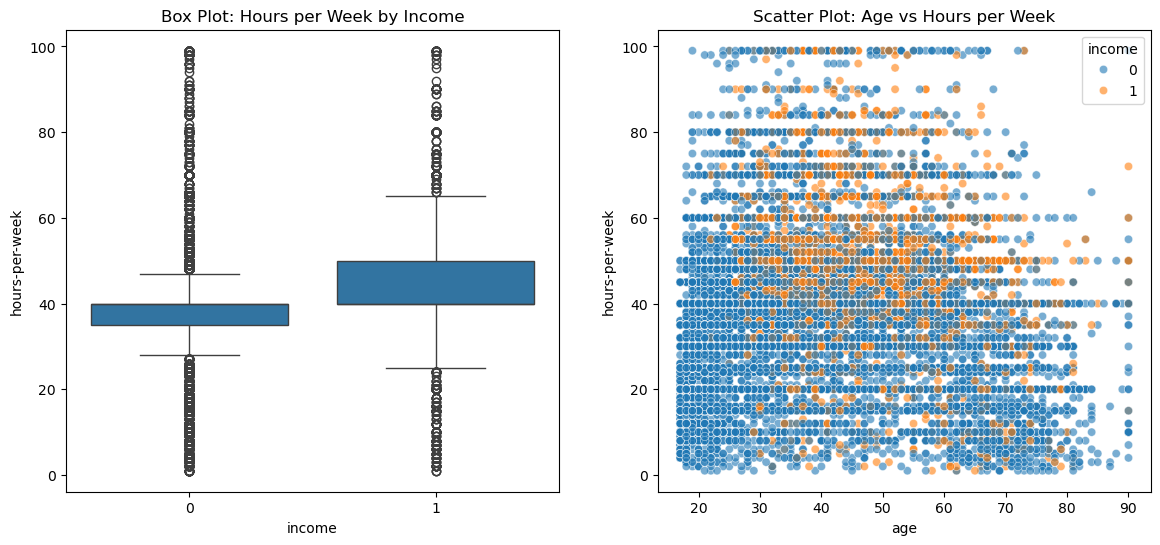

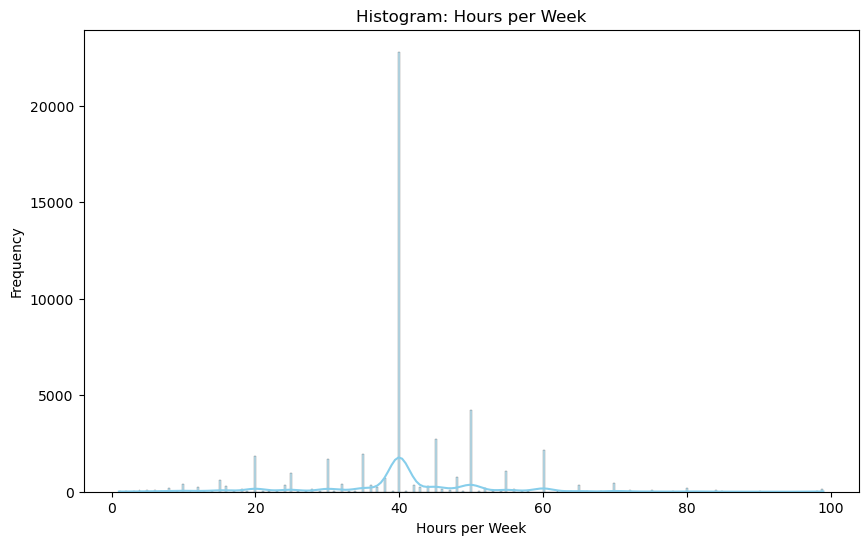

In [17]:
# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
sns.boxplot(data=df, x='income', y='hours-per-week', ax=axes[0])
axes[0].set_title('Box Plot: Hours per Week by Income')

# Scatter plot
sns.scatterplot(data=df, x='age', y='hours-per-week', hue='income', alpha=0.6, ax=axes[1])
axes[1].set_title('Scatter Plot: Age vs Hours per Week')

# Histogram for hours-per-week
plt.figure(figsize=(10, 6))
sns.histplot(df['hours-per-week'], kde=True, color='skyblue')
plt.title('Histogram: Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()

